# Coding a Vectorizer

In [1]:
# load required modules
import numpy as np
from re import sub
import spacy
nlp = spacy.load('en_core_web_sm')

In [273]:
class Vectorizer():
    """
    A class used to represent a corpus as simple TF or TF-IDF normalized vectors
    
    ...

    Attributes
    ----------
    docs : list
        original documents provided by user
    docs_processed : list
        documents after basic preprocessing
    vocab : list
        unique words in all documents
    idf : dict
        contains all words in the vocabulary as keys and their respective
        Inverse Document Frequency (IDF) as the values
    
    tf: 2D numpy array
        matrix containning the Term-Frequency representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
        
    tfidf: 2D numpy array
        matrix containning the Term-Frequency IDF representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
    
    tf_normalized: 2D numpy array
        normalized version of tf (l2 norm equal to 1)
    
    tfidf_normalized: 2D numpy array
        normalized version of tfidf (l2 norm equal to 1)
    

    Methods
    -------
    preprocessor()
    
    get_vocab()
    
    get_IDF()
    
    get_TF()
    
    get_TF_IDF()
    
    normalize(method)
        choose to normalize the TF or the TF-IDF corpus representation
    
    
    """
    
    
    def __init__(self, docs):
        self.docs = docs
        self.docs_processed = []
        self.vocab = None
        self.idf = dict()
        self.tf = None
        self.tfidf = None
        self.tf_normalized = None
        self.tfidf_normalized = None
        
    def preprocess(self):
        """ A function to perform preprocessing tasks on a list of documents.
        
        The following tasks are implemented:
                - remove puntuation
                - transform words into lowercase
                - lemmatize the document
                - represent the document as a list of lemmas
        """
    
        for idx, doc in enumerate(self.docs):
            
            # 1. remove punctuation and transform into lowercase
            doc_punc = sub('[^\w|\s]', '', doc.lower())

            # 2. represent the document as a list of lemmas
            doc_lemmas = [token.lemma_ for token in nlp(doc_punc)]

            # 3. remove the -PRON- from list
            doc_lemmas = [lemma for lemma in doc_lemmas if lemma != '-PRON-']
            
            # 4. append this list of lemmas to the list of cleanned documents
            self.docs_processed.append(doc_lemmas)
    

    def get_vocab(self):
        """ A function to generate the vocabulary from the preprocessed corpus
        """
        vocab = set()
        for doc in self.docs_processed:
            vocab = vocab.union(doc)
        
        # update the vocab attribute
        self.vocab = list(vocab)
    
    def get_IDF(self):
        """ A function to calculate the Inverse Document Frequency (IDF) 
        for each word in the vocabulary
        """
        
        for word in self.vocab:
            count = 0
            for doc in self.docs_processed:
                if word in doc: count += 1

            # create entry in the dictionary with the word and its IDF value
            self.idf[word] = np.log(len(self.docs_processed)/count)
        
    
    def get_TF_IDF(self):
        """ A function to calculate the Term Frequency-Inverse Document Frequency
        for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF-IDF of the word
                array[idx, pos] = freq*self.idf[word]
        
        # update the attribute
        self.tfidf = array
        
        
    def get_TF(self):
        """ A function to calculate the Term Frequency for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF of the word
                array[idx, pos] = freq
        
        # update the attribute
        self.tf = array
        
    def normalize(self, method):
        """ A function to normalize all vectors from the user selected array
        """
        
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        if method == 'TF-IDF':
            for idx,vector in enumerate(self.tfidf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tfidf_normalized = array
            
        elif method == 'TF':
            for idx,vector in enumerate(self.tf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tf_normalized = array
        else:
            print('Method not valid')          

In [274]:
docs = ['People who see ghosts',

        '"I dont believe people who see ghosts", said Mannie, before spitting into the wind and riding his bike down the street at top speed. He then went home and ate peanut-butter and jelly sandwiches all day. Mannie really liked peanut-butter and jelly sandwiches. He ate them so much that his poor mother had to purchase a new jar of peanut butter every afternoon.',

        'People see incredible things. One time I saw some people talking about things they were seeing, and those people were so much fun. They saw clouds and they saw airplanes. They saw dirt and they saw worms. Can you believe the amount of seeing done by these people? People are the best.',

        'This is an article about a circus. A Circus is where people go to see other people who perform great things. Circuses also have elephants and tigers, which generally get a big woop from the crowd.',

        'Lots of people have come down with Coronavirus. You can see the latest numbers and follow our updates on the pandemic below. Please, stay safe.',

        'Goats are lovely creatures. Many people love goats. People who love goats love seeing them play in the fields.',

        'We have collected a report of people in our community seeing ghosts. Each resident was asked "how many ghosts have you seen?", "describe the last ghost you saw", and "tell us about your mother." Afterwards, we compared the ghost reports between the different individuals, and assessed whether or not they were actually seeing these apparitions.']



## Exploration

In [275]:
# initialize class
vectorizer = Vectorizer(docs)
vectorizer.preprocess()

In [276]:
# check the results of preprocessing
print(docs[3])
print('\n ===================================================== \n')
print(vectorizer.docs_processed[3])

This is an article about a circus. A Circus is where people go to see other people who perform great things. Circuses also have elephants and tigers, which generally get a big woop from the crowd.


['this', 'be', 'an', 'article', 'about', 'a', 'circus', 'a', 'circus', 'be', 'where', 'people', 'go', 'to', 'see', 'other', 'people', 'who', 'perform', 'great', 'thing', 'circus', 'also', 'have', 'elephant', 'and', 'tiger', 'which', 'generally', 'get', 'a', 'big', 'woop', 'from', 'the', 'crowd']


In [277]:
# get the vocab
vectorizer.get_vocab()
print(len(vectorizer.vocab))
vectorizer.vocab

129


['afterwards',
 'tiger',
 'about',
 'spit',
 'bike',
 'poor',
 'other',
 'good',
 'apparition',
 'ghost',
 'airplane',
 'come',
 'below',
 'whether',
 'see',
 'with',
 'describe',
 'top',
 'before',
 'safe',
 'to',
 'coronavirus',
 'every',
 'by',
 'believe',
 'into',
 'wind',
 'all',
 'resident',
 'or',
 'actually',
 'worm',
 'lovely',
 'jelly',
 'how',
 'purchase',
 'ask',
 'dirt',
 'incredible',
 'field',
 'the',
 'of',
 'peanut',
 'fun',
 'community',
 'then',
 'thing',
 'follow',
 'like',
 'time',
 'update',
 'really',
 'different',
 'one',
 'afternoon',
 'each',
 'many',
 'this',
 'perform',
 'cloud',
 'talk',
 'creature',
 'big',
 'compare',
 'lot',
 'be',
 'number',
 'an',
 'i',
 'street',
 'report',
 'down',
 'individual',
 'new',
 'also',
 'generally',
 'collect',
 'jar',
 'and',
 'article',
 'get',
 'amount',
 'so',
 'people',
 'say',
 'on',
 'pandemic',
 'mother',
 'elephant',
 'go',
 'those',
 'last',
 'have',
 'day',
 'assess',
 'which',
 'speed',
 'sandwich',
 'goat',
 '

In [278]:
# calculate the IDF
vectorizer.get_IDF()
print(len(vectorizer.idf))
vectorizer.idf

129


{'afterwards': 1.9459101490553132,
 'tiger': 1.9459101490553132,
 'about': 0.8472978603872037,
 'spit': 1.9459101490553132,
 'bike': 1.9459101490553132,
 'poor': 1.9459101490553132,
 'other': 1.9459101490553132,
 'good': 1.9459101490553132,
 'apparition': 1.9459101490553132,
 'ghost': 0.8472978603872037,
 'airplane': 1.9459101490553132,
 'come': 1.9459101490553132,
 'below': 1.9459101490553132,
 'whether': 1.9459101490553132,
 'see': 0.0,
 'with': 1.9459101490553132,
 'describe': 1.9459101490553132,
 'top': 1.9459101490553132,
 'before': 1.9459101490553132,
 'safe': 1.9459101490553132,
 'to': 1.252762968495368,
 'coronavirus': 1.9459101490553132,
 'every': 1.9459101490553132,
 'by': 1.9459101490553132,
 'believe': 1.252762968495368,
 'into': 1.9459101490553132,
 'wind': 1.9459101490553132,
 'all': 1.9459101490553132,
 'resident': 1.9459101490553132,
 'or': 1.9459101490553132,
 'actually': 1.9459101490553132,
 'worm': 1.9459101490553132,
 'lovely': 1.9459101490553132,
 'jelly': 1.945910

In [279]:
len(vectorizer.idf), len(vectorizer.vocab)

(129, 129)

In [280]:
# calculate TF-IDF
vectorizer.get_TF_IDF()
print(vectorizer.tfidf.shape)
print(vectorizer.docs_processed[0])
vectorizer.tfidf[0]

(7, 129)
['people', 'who', 'see', 'ghost']


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.84729786,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [281]:
print(vectorizer.idf['who'])
print(vectorizer.idf['ghost'])
print(vectorizer.idf['people'])
print(vectorizer.idf['see'])

0.5596157879354227
0.8472978603872037
0.0
0.0


In [282]:
# finally, we should normalize all the vectors
vectorizer.normalize(method = 'TF-IDF')
vectorizer.tfidf_normalized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.83442862,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [283]:
# check normalization
for vector in vectorizer.tfidf_normalized:
    print(np.linalg.norm(vector))

1.0000000000000002
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999


## Everything together (compactly)

In [284]:
# initialize class
vectorizer = Vectorizer(docs)

# preprocess the documents
vectorizer.preprocess()

# generate the vocabulary
vectorizer.get_vocab()

# calculate the IDF
vectorizer.get_IDF()

# calculate the TF-IDF corpus representation
vectorizer.get_TF_IDF()

# normalize vectors
vectorizer.normalize(method = 'TF-IDF')

X = vectorizer.tfidf_normalized

In [285]:
X.shape

(7, 129)

In [286]:
np.linalg.norm(X[4])

1.0

In [287]:
def pairwise_distance(X):
    N = X.shape[0]
    dists = np.zeros((N, N))
    for i, a in enumerate(X):
        for j, b in enumerate(X):
            dists[i, j] = np.linalg.norm(a - b)

    return dists


def get_score(vecs):
    dists = pairwise_distance(vecs)
    mxidx = np.argmin(dists[0][1:-1]) + 1
    next_best = np.linalg.norm(vecs[mxidx] - vecs[0]) 
    target = np.linalg.norm(vecs[-1] - vecs[0])
    score = next_best / target
    print('SCORE: ', score)
    return(score)

# Use get_score to check the score for assignment 3!

## Question 1

In [288]:
#    Show that the euclidean distance and cosine distance
#    are proportional (preserve the relative distance between 
#    all the documents). Remember, this is only the case 
#    because of the normalized vectors.

In [289]:
# lets define a function to calculate the cosine distance
def pairwise_distance_cos(X):
    N = X.shape[0]
    dists = np.zeros((N, N))
    for i, a in enumerate(X):
        for j, b in enumerate(X):
            dists[i, j] = 1 - np.dot(np.transpose(a),b)

    return dists

In [290]:
# calculate both types of distances
euclidean_dist = pairwise_distance(X)
cos_dist = pairwise_distance_cos(X)

In [291]:
# get each pair of
def get_pairs(matrix):
    pairs = []
    dist = []
    for i in range(len(matrix)):
        for j in range(i+1, len(matrix)):
            pairs.append((i,j))
            dist.append(matrix[i,j])

    return(pairs,dist)

In [292]:
pairs, dist = get_pairs(euclidean_dist)
sorted_idx = np.argsort(dist)

In [293]:
print("*** Ranking of pairwise distances between documents (increasing order)")
print(" =============================== ")
for i in sorted_idx:
    print("\n Pair with indexes: ", pairs[i])
    print("Distance between documents in the pair: " , dist[i])

*** Ranking of pairwise distances between documents (increasing order)

 Pair with indexes:  (0, 6)
Distance between documents in the pair:  1.2099517421851025

 Pair with indexes:  (1, 2)
Distance between documents in the pair:  1.3568033539451514

 Pair with indexes:  (0, 1)
Distance between documents in the pair:  1.361709631715843

 Pair with indexes:  (2, 3)
Distance between documents in the pair:  1.3663124035621907

 Pair with indexes:  (1, 6)
Distance between documents in the pair:  1.371655536118036

 Pair with indexes:  (2, 6)
Distance between documents in the pair:  1.3726469594624315

 Pair with indexes:  (3, 6)
Distance between documents in the pair:  1.3819292145995907

 Pair with indexes:  (1, 3)
Distance between documents in the pair:  1.383139532281545

 Pair with indexes:  (5, 6)
Distance between documents in the pair:  1.3863921699314867

 Pair with indexes:  (2, 4)
Distance between documents in the pair:  1.388964012802606

 Pair with indexes:  (0, 5)
Distance betwe

In [294]:
pairs_cos, dist_cos = get_pairs(cos_dist)
sorted_idx_cos = np.argsort(dist_cos)

In [295]:
print("*** Ranking of pairwise distances between documents (increasing order)")
print(" =============================== ")
for i in sorted_idx_cos:
    print("\n Pair with indexes: ", pairs_cos[i])
    print("Distance between documents in the pair: " , dist_cos[i])

*** Ranking of pairwise distances between documents (increasing order)

 Pair with indexes:  (0, 6)
Distance between documents in the pair:  0.7319916092083822

 Pair with indexes:  (1, 2)
Distance between documents in the pair:  0.9204576706384061

 Pair with indexes:  (0, 1)
Distance between documents in the pair:  0.9271265605538483

 Pair with indexes:  (2, 3)
Distance between documents in the pair:  0.9334047920639456

 Pair with indexes:  (1, 6)
Distance between documents in the pair:  0.9407194548816287

 Pair with indexes:  (2, 6)
Distance between documents in the pair:  0.9420798376607294

 Pair with indexes:  (3, 6)
Distance between documents in the pair:  0.9548641770819211

 Pair with indexes:  (1, 3)
Distance between documents in the pair:  0.9565374828800056

 Pair with indexes:  (5, 6)
Distance between documents in the pair:  0.9610416244236684

 Pair with indexes:  (2, 4)
Distance between documents in the pair:  0.964610514430359

 Pair with indexes:  (0, 5)
Distance be

The order seems to be exactly the same but... is it?

In [296]:
for eu,cos in zip(sorted_idx, sorted_idx_cos):
    if eu == cos:
        print('Pair ', pairs_cos[cos], ' is equally ranked with both distances!')

Pair  (0, 6)  is equally ranked with both distances!
Pair  (1, 2)  is equally ranked with both distances!
Pair  (0, 1)  is equally ranked with both distances!
Pair  (2, 3)  is equally ranked with both distances!
Pair  (1, 6)  is equally ranked with both distances!
Pair  (2, 6)  is equally ranked with both distances!
Pair  (3, 6)  is equally ranked with both distances!
Pair  (1, 3)  is equally ranked with both distances!
Pair  (5, 6)  is equally ranked with both distances!
Pair  (2, 4)  is equally ranked with both distances!
Pair  (0, 5)  is equally ranked with both distances!
Pair  (0, 3)  is equally ranked with both distances!
Pair  (1, 4)  is equally ranked with both distances!
Pair  (4, 6)  is equally ranked with both distances!
Pair  (2, 5)  is equally ranked with both distances!
Pair  (3, 5)  is equally ranked with both distances!
Pair  (3, 4)  is equally ranked with both distances!
Pair  (1, 5)  is equally ranked with both distances!
Pair  (4, 5)  is equally ranked with both dist

## Question 2

In [297]:
#    Print out a 2D heatmap (seaborn heatmap, for example) of the
#    pairwise distances between all the documents. Do they make
#    sense? 

In [298]:
import seaborn as sns
import matplotlib. pyplot as plt

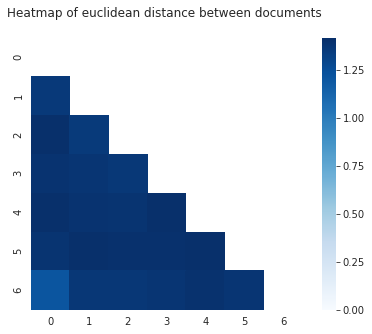

In [299]:
mask = np.zeros_like(euclidean_dist)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(euclidean_dist, mask=mask, square=True, cmap = "Blues")
    plt.title('Heatmap of euclidean distance between documents \n')

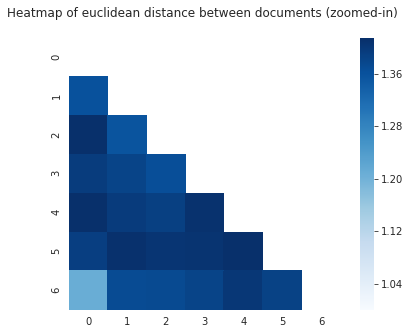

In [300]:
mask = np.zeros_like(euclidean_dist)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(euclidean_dist, mask=mask,vmin = 1, square=True, cmap = "Blues")
    plt.title('Heatmap of euclidean distance between documents (zoomed-in) \n')

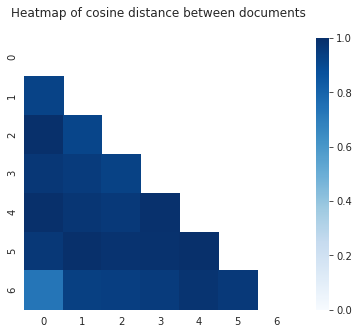

In [301]:
mask = np.zeros_like(cos_dist)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(cos_dist, mask=mask, square=True, cmap = "Blues")
    plt.title('Heatmap of cosine distance between documents \n')

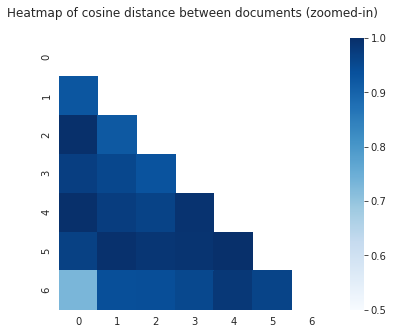

In [302]:
mask = np.zeros_like(cos_dist)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(cos_dist, mask=mask, vmin = 0.5, square=True, cmap = "Blues")
    plt.title('Heatmap of cosine distance between documents (zoomed-in) \n')

Both in the case of the euclidean distances and in the cosine distances, the heatmaps appear to make sense. Although the distance between documents seems to be quite similar, the distance between the "query document" (document with index 0) and the "target document" (document with index 6) is clearly the smallest.

## Question 3

In [303]:
#    Get the euclidean distance between the "query document" 
#    ("People who see ghosts") to be closer to the "target document"
#    ("We have collected a report...") than any other document
#    in the corpus. Report a ratio of next_closest/target, which 
#    should be > 1. This is a competition! I will report those who 
#    get the highest score (without doing silly things).
#
#    Try to use the various optimizations (preprocessing, forms of 
#    TF-IDF, word removal, etc.) discussed in the slides to increase
#    the separation and increase the ratio.

In [304]:
# lets save the results we are going to get
results = dict()

### First option:
- Lemmatization
- TF-IDF

In [305]:
results['option_1'] = get_score(X)

SCORE:  1.125424745665207


### Second option:
- Lemmatization
- TF-IDF
- "Trick 1" in the IDF calculation

In [306]:
class Vectorizer():
    """
    A class used to represent a corpus as simple TF or TF-IDF normalized vectors
    
    ...

    Attributes
    ----------
    docs : list
        original documents provided by user
    docs_processed : list
        documents after basic preprocessing
    vocab : list
        unique words in all documents
    idf : dict
        contains all words in the vocabulary as keys and their respective
        Inverse Document Frequency (IDF) as the values
    
    tf: 2D numpy array
        matrix containning the Term-Frequency representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
        
    tfidf: 2D numpy array
        matrix containning the Term-Frequency IDF representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
    
    tf_normalized: 2D numpy array
        normalized version of tf (l2 norm equal to 1)
    
    tfidf_normalized: 2D numpy array
        normalized version of tfidf (l2 norm equal to 1)
    

    Methods
    -------
    preprocessor()
    
    get_vocab()
    
    get_IDF()
    
    get_TF()
    
    get_TF_IDF()
    
    normalize(method)
        choose to normalize the TF or the TF-IDF corpus representation
    
    
    """
    
    
    def __init__(self, docs):
        self.docs = docs
        self.docs_processed = []
        self.vocab = None
        self.idf = dict()
        self.tf = None
        self.tfidf = None
        self.tf_normalized = None
        self.tfidf_normalized = None
        
    def preprocess(self):
        """ A function to perform preprocessing tasks on a list of documents.
        
        The following tasks are implemented:
                - remove puntuation
                - transform words into lowercase
                - lemmatize the document
                - represent the document as a list of lemmas
        """
    
        for idx, doc in enumerate(self.docs):
            
            # 1. remove punctuation and transform into lowercase
            doc_punc = sub('[^\w|\s]', '', doc.lower())

            # 2. represent the document as a list of lemmas
            doc_lemmas = [token.lemma_ for token in nlp(doc_punc)]

            # 3. remove the -PRON- from list
            doc_lemmas = [lemma for lemma in doc_lemmas if lemma != '-PRON-']
            
            # 4. append this list of lemmas to the list of cleanned documents
            self.docs_processed.append(doc_lemmas)
    

    def get_vocab(self):
        """ A function to generate the vocabulary from the preprocessed corpus
        """
        vocab = set()
        for doc in self.docs_processed:
            vocab = vocab.union(doc)
        
        # update the vocab attribute
        self.vocab = list(vocab)
    
    def get_IDF(self):
        """ A function to calculate the Inverse Document Frequency (IDF) 
        for each word in the vocabulary
        """
        
        for word in self.vocab:
            count = 0
            for doc in self.docs_processed:
                if word in doc: count += 1

            # create entry in the dictionary with the word and its IDF value
            self.idf[word] = np.log(len(self.docs_processed)/(1 + count))
        
    
    def get_TF_IDF(self):
        """ A function to calculate the Term Frequency-Inverse Document Frequency
        for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF-IDF of the word
                array[idx, pos] = freq*self.idf[word]
        
        # update the attribute
        self.tfidf = array
        
        
    def get_TF(self):
        """ A function to calculate the Term Frequency for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF of the word
                array[idx, pos] = freq
        
        # update the attribute
        self.tf = array
        
    def normalize(self, method):
        """ A function to normalize all vectors from the user selected array
        """
        
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        if method == 'TF-IDF':
            for idx,vector in enumerate(self.tfidf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tfidf_normalized = array
            
        elif method == 'TF':
            for idx,vector in enumerate(self.tf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tf_normalized = array
        else:
            print('Method not valid')          

In [307]:
# initialize class
vectorizer = Vectorizer(docs)

# preprocess the documents
vectorizer.preprocess()

# generate the vocabulary
vectorizer.get_vocab()

# calculate the IDF
vectorizer.get_IDF()

# calculate the TF-IDF corpus representation
vectorizer.get_TF_IDF()

# normalize vectors
vectorizer.normalize(method = 'TF-IDF')

X2 = vectorizer.tfidf_normalized

In [308]:
results['option_2'] = get_score(X2)
results

SCORE:  1.1400051439811252


{'option_1': 1.125424745665207, 'option_2': 1.1400051439811252}

### Third option:
- Lemmatization
- nltk stopwords removal
- TF-IDF
- "Trick 2" in the IDF calculation

In [309]:
class Vectorizer():
    """
    A class used to represent a corpus as simple TF or TF-IDF normalized vectors
    
    ...

    Attributes
    ----------
    docs : list
        original documents provided by user
    docs_processed : list
        documents after basic preprocessing
    vocab : list
        unique words in all documents
    idf : dict
        contains all words in the vocabulary as keys and their respective
        Inverse Document Frequency (IDF) as the values
    
    tf: 2D numpy array
        matrix containning the Term-Frequency representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
        
    tfidf: 2D numpy array
        matrix containning the Term-Frequency IDF representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
    
    tf_normalized: 2D numpy array
        normalized version of tf (l2 norm equal to 1)
    
    tfidf_normalized: 2D numpy array
        normalized version of tfidf (l2 norm equal to 1)
    

    Methods
    -------
    preprocessor()
    
    get_vocab()
    
    get_IDF()
    
    get_TF()
    
    get_TF_IDF()
    
    normalize(method)
        choose to normalize the TF or the TF-IDF corpus representation
    
    
    """
    
    
    def __init__(self, docs):
        self.docs = docs
        self.docs_processed = []
        self.vocab = None
        self.idf = dict()
        self.tf = None
        self.tfidf = None
        self.tf_normalized = None
        self.tfidf_normalized = None
        
    def preprocess(self):
        """ A function to perform preprocessing tasks on a list of documents.
        
        The following tasks are implemented:
                - remove puntuation
                - transform words into lowercase
                - lemmatize the document
                - represent the document as a list of lemmas
        """
    
        for idx, doc in enumerate(self.docs):
            
            # 1. remove punctuation and transform into lowercase
            doc_punc = sub('[^\w|\s]', '', doc.lower())

            # 2. represent the document as a list of lemmas
            doc_lemmas = [token.lemma_ for token in nlp(doc_punc)]

            # 3. remove the -PRON- from list
            doc_lemmas = [lemma for lemma in doc_lemmas if lemma != '-PRON-']
            
            # 4. append this list of lemmas to the list of cleanned documents
            self.docs_processed.append(doc_lemmas)
    

    def get_vocab(self):
        """ A function to generate the vocabulary from the preprocessed corpus
        """
        vocab = set()
        for doc in self.docs_processed:
            vocab = vocab.union(doc)
        
        # update the vocab attribute
        self.vocab = list(vocab)
    
    def get_IDF(self):
        """ A function to calculate the Inverse Document Frequency (IDF) 
        for each word in the vocabulary
        """
        
        for word in self.vocab:
            count = 0
            for doc in self.docs_processed:
                if word in doc: count += 1

            # create entry in the dictionary with the word and its IDF value
            self.idf[word] = 1 + np.log(len(self.docs_processed)/(count))
        
    
    def get_TF_IDF(self):
        """ A function to calculate the Term Frequency-Inverse Document Frequency
        for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF-IDF of the word
                array[idx, pos] = freq*self.idf[word]
        
        # update the attribute
        self.tfidf = array
        
        
    def get_TF(self):
        """ A function to calculate the Term Frequency for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF of the word
                array[idx, pos] = freq
        
        # update the attribute
        self.tf = array
        
    def normalize(self, method):
        """ A function to normalize all vectors from the user selected array
        """
        
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        if method == 'TF-IDF':
            for idx,vector in enumerate(self.tfidf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tfidf_normalized = array
            
        elif method == 'TF':
            for idx,vector in enumerate(self.tf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tf_normalized = array
        else:
            print('Method not valid')          

In [310]:
# initialize class
vectorizer = Vectorizer(docs)

# preprocess the documents
vectorizer.preprocess()

# generate the vocabulary
vectorizer.get_vocab()

# calculate the IDF
vectorizer.get_IDF()

# calculate the TF-IDF corpus representation
vectorizer.get_TF_IDF()

# normalize vectors
vectorizer.normalize(method = 'TF-IDF')

X3 = vectorizer.tfidf_normalized

In [311]:
results['option_3'] = get_score(X3)
results

SCORE:  1.0733131684665371


{'option_1': 1.125424745665207,
 'option_2': 1.1400051439811252,
 'option_3': 1.0733131684665371}

### Fourth option:
- Lemmatization
- nltk stopwords removal
- TF-IDF
- "Trick 1" in the IDF calculation

In [324]:
class Vectorizer():
    """
    A class used to represent a corpus as simple TF or TF-IDF normalized vectors
    
    ...

    Attributes
    ----------
    docs : list
        original documents provided by user
    docs_processed : list
        documents after basic preprocessing
    vocab : list
        unique words in all documents
    idf : dict
        contains all words in the vocabulary as keys and their respective
        Inverse Document Frequency (IDF) as the values
    
    tf: 2D numpy array
        matrix containning the Term-Frequency representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
        
    tfidf: 2D numpy array
        matrix containning the Term-Frequency IDF representation of the corpus.
        rows represent documents and columns represent each word in the vocabulary
    
    tf_normalized: 2D numpy array
        normalized version of tf (l2 norm equal to 1)
    
    tfidf_normalized: 2D numpy array
        normalized version of tfidf (l2 norm equal to 1)
    

    Methods
    -------
    preprocessor(stopwords)
    
    get_vocab()
    
    get_IDF()
    
    get_TF()
    
    get_TF_IDF()
    
    normalize(method)
        choose to normalize the TF or the TF-IDF corpus representation
    
    
    """
    
    
    def __init__(self, docs):
        self.docs = docs
        self.docs_processed = []
        self.vocab = None
        self.idf = dict()
        self.tf = None
        self.tfidf = None
        self.tf_normalized = None
        self.tfidf_normalized = None
        
    def preprocess(self, stopwords):
        """ A function to perform preprocessing tasks on a list of documents.
        
        The following tasks are implemented:
                - remove puntuation
                - transform words into lowercase
                - lemmatize the document
                - represent the document as a list of lemmas
        """
    
        for idx, doc in enumerate(self.docs):
            
            # 1. remove punctuation and transform into lowercase
            doc_punc = sub('[^\w|\s]', '', doc.lower())

            # 2. represent the document as a list of lemmas
            doc_lemmas = [token.lemma_ for token in nlp(doc_punc)]

            # NEW: remove stopwords
            doc_lemmas = [lemma for lemma in doc_lemmas if lemma not in stopwords]
            
            # 3. remove the -PRON- from list
            doc_lemmas = [lemma for lemma in doc_lemmas if lemma != '-PRON-']
            
            # 4. append this list of lemmas to the list of cleanned documents
            self.docs_processed.append(doc_lemmas)
    

    def get_vocab(self):
        """ A function to generate the vocabulary from the preprocessed corpus
        """
        vocab = set()
        for doc in self.docs_processed:
            vocab = vocab.union(doc)
        
        # update the vocab attribute
        self.vocab = list(vocab)
    
    def get_IDF(self):
        """ A function to calculate the Inverse Document Frequency (IDF) 
        for each word in the vocabulary
        """
        
        for word in self.vocab:
            count = 0
            for doc in self.docs_processed:
                if word in doc: count += 1

            # create entry in the dictionary with the word and its IDF value
            self.idf[word] = np.log(len(self.docs_processed)/(count + 1))
        
    
    def get_TF_IDF(self):
        """ A function to calculate the Term Frequency-Inverse Document Frequency
        for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF-IDF of the word
                array[idx, pos] = freq*self.idf[word]
        
        # update the attribute
        self.tfidf = array
        
        
    def get_TF(self):
        """ A function to calculate the Term Frequency for all documents in the corpus
        """
        
        # create a new array with the adequate dimensions (full of zeros)
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        for idx, doc in enumerate(self.docs_processed):
            # count the frequency of appearences of each unique word/lemma
            for word in set(doc):
                freq = doc.count(word)
                # get the position of the word in the vocabulary
                pos = self.vocab.index(word)
                # include in the array the TF of the word
                array[idx, pos] = freq
        
        # update the attribute
        self.tf = array
        
    def normalize(self, method):
        """ A function to normalize all vectors from the user selected array
        """
        
        array = np.zeros((len(self.docs_processed), len(self.vocab)))
        
        if method == 'TF-IDF':
            for idx,vector in enumerate(self.tfidf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tfidf_normalized = array
            
        elif method == 'TF':
            for idx,vector in enumerate(self.tf):
                array[idx] = vector/np.linalg.norm(vector)
            
            # update attribute
            self.tf_normalized = array
        else:
            print('Method not valid')          

In [325]:
import nltk
from nltk.corpus import stopwords
# download stop words
nltk.download('stopwords')
# load all stop words in english
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/yabra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [326]:
# initialize class
vectorizer = Vectorizer(docs)

# preprocess the documents
vectorizer.preprocess(stop_words)

# generate the vocabulary
vectorizer.get_vocab()

# calculate the IDF
vectorizer.get_IDF()

# calculate the TF-IDF corpus representation
vectorizer.get_TF_IDF()

# normalize vectors
vectorizer.normalize(method = 'TF-IDF')

X4 = vectorizer.tfidf_normalized

In [327]:
results['option_4'] = get_score(X4)
results

SCORE:  1.2129098485550494


{'option_1': 1.125424745665207,
 'option_2': 1.1400051439811252,
 'option_3': 1.0733131684665371,
 'option_4': 1.2129098485550494}